In [1]:
import numpy as np
import requests
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.interpolate import griddata
import matplotlib.patches as patches

In [2]:
berger2019V4 = pd.read_csv("stellarCatalogs/GKSPC_InOut_V4.csv", dtype={"band":str})


In [3]:
x=np.linspace(0.7,2.0,1000);
ruwe = berger2019V4.RUWE[berger2019V4.RUWE<2];
ruwe2 = berger2019V4.RUWE[berger2019V4.RUWE<1.15];
ruwe2Bright = berger2019V4.RUWE[(berger2019V4.RUWE<1.15) & (berger2019V4.gmag <= 13)];
ruwe2Dim = berger2019V4.RUWE[(berger2019V4.RUWE<1.15) & (berger2019V4.gmag > 13)];
madRuwe = stats.median_absolute_deviation(ruwe2);
medRuwe = np.median(ruwe2);

hDat = np.histogram(ruwe, 1000);
valX = (hDat[1][0:-1] + hDat[1][1:])/2;
valY = hDat[0];
y = stats.norm.pdf(valX, medRuwe, madRuwe);
s = np.dot(y,valY)/np.dot(y,y);


In [4]:
from scipy.optimize import minimize
def gf(theta, ruweDistg, nBinsg):
    hDatg = np.histogram(ruweDistg, nBinsg);
    valXg = (hDatg[1][0:-1] + hDatg[1][1:])/2;
    valYg = hDatg[0];
    yg = stats.norm.pdf(valXg, theta[0], theta[1]);
    f = (theta[2]*yg - valYg);
    return np.dot(f,f);


 RUWE < 1.15
[1.00723397e+00 6.60689012e-02 2.79135597e+02]


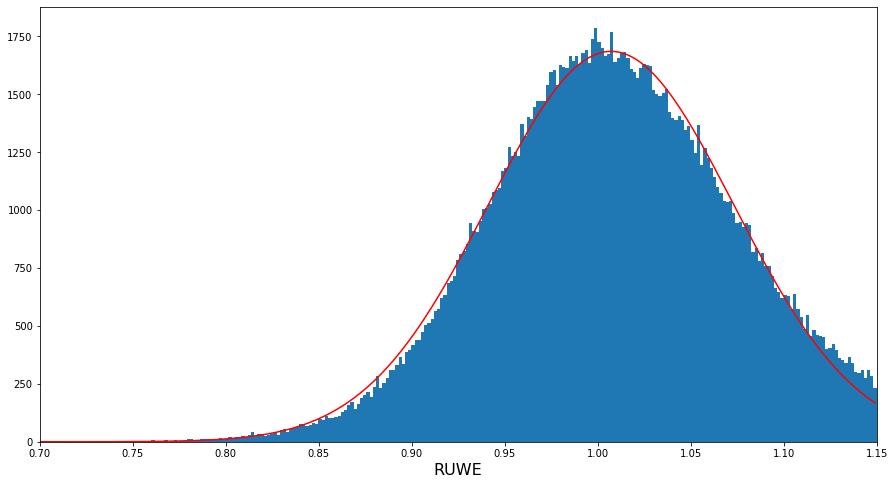

In [5]:
nBins=300

theta_0 = [medRuwe, madRuwe, s];

r = minimize(gf, theta_0, args=(ruwe2, nBins), method="Nelder-Mead")
print(" RUWE < 1.15")
print(r.x)

hDat = np.histogram(ruwe2, nBins);
valX = (hDat[1][0:-1] + hDat[1][1:])/2;
valY = hDat[0];
y = r.x[2]*stats.norm.pdf(valX, r.x[0], r.x[1]);
plt.figure(figsize=(15,8));
plt.hist(ruwe2, nBins);
plt.plot(valX, y, 'r');
plt.xlabel("RUWE", fontSize=16);
plt.xlim(0.7,1.15);

In [6]:
s

219.33381012450732

Bright RUWE < 1.15
[1.00898863e+00 6.43618751e-02 1.97285991e+02]


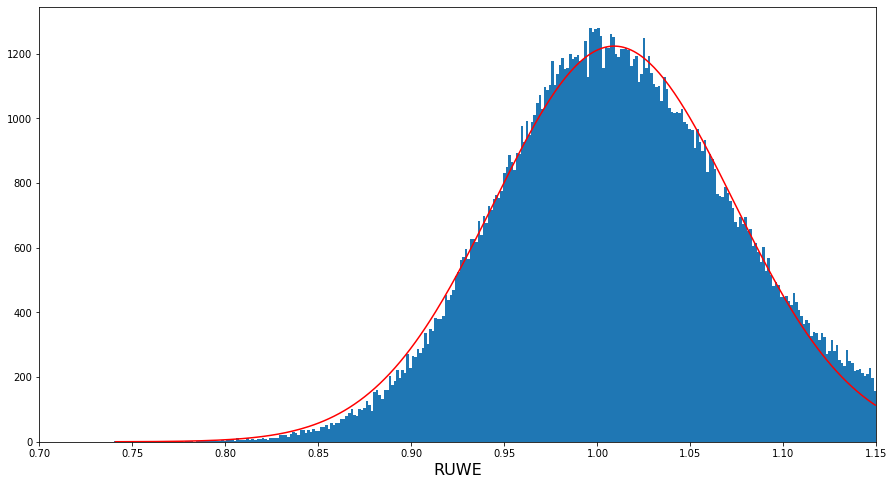

In [7]:
nBins=300

theta_0 = [medRuwe, madRuwe, s];

rDim = minimize(gf, theta_0, args=(ruwe2Dim, nBins), method="Nelder-Mead")
print("Bright RUWE < 1.15")
print(rDim.x)

hDat = np.histogram(ruwe2Dim, nBins);
valX = (hDat[1][0:-1] + hDat[1][1:])/2;
valY = hDat[0];
y = rDim.x[2]*stats.norm.pdf(valX, rDim.x[0], rDim.x[1]);
# s = np.dot(y,valY)/np.dot(y,y);
plt.figure(figsize=(15,8));
plt.hist(ruwe2Dim, nBins);
plt.plot(valX, y, 'r');
plt.xlabel("RUWE", fontSize=16);
plt.xlim(0.7,1.15);

Bright RUWE < 1.15
[ 0.98471972  0.08127587 30.60203354]


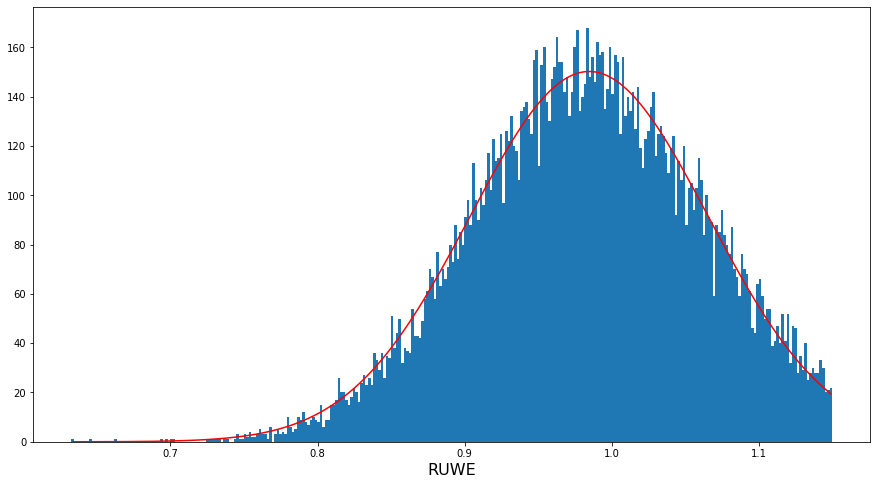

In [8]:
nBins=300

theta_0 = [medRuwe, madRuwe, s];

rBright = minimize(gf, theta_0, args=(ruwe2Bright, nBins), method="Nelder-Mead")
print("Bright RUWE < 1.15")
print(rBright.x)

hDat = np.histogram(ruwe2Bright, nBins);
valX = (hDat[1][0:-1] + hDat[1][1:])/2;
valY = hDat[0];
y = rBright.x[2]*stats.norm.pdf(valX, rBright.x[0], rBright.x[1]);
# s = np.dot(y,valY)/np.dot(y,y);
plt.figure(figsize=(15,8));
plt.hist(ruwe2Bright, nBins);
plt.plot(valX, y, 'r');
plt.xlabel("RUWE", fontSize=16);


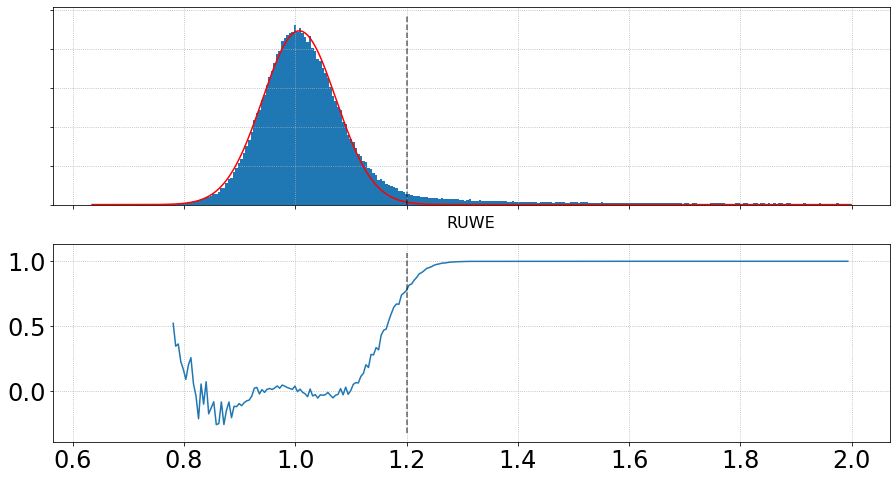

In [9]:
hDat = np.histogram(ruwe, nBins);
valX = (hDat[1][0:-1] + hDat[1][1:])/2;
valY = hDat[0];
y = stats.norm.pdf(valX, r.x[0], r.x[1]);
s = np.dot(y,valY)/np.dot(y,y);

fig = plt.figure(figsize=(15,8));
ax = fig.add_subplot(2, 1, 1)
plt.hist(ruwe, nBins);
plt.plot(valX, s*y, 'r');
plt.plot([1.2,1.2],plt.ylim(), 'k--', alpha=0.6);
plt.grid(linestyle = ':');
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])
plt.xlabel("RUWE", fontSize=16);
xl = plt.xlim();

ax = fig.add_subplot(2, 1, 2)
ycut = 20;
plt.plot(valX[valY>=ycut], (valY[valY>=ycut]-s*y[valY>=ycut])/valY[valY>=ycut]);
plt.plot([1.2,1.2],plt.ylim(), 'k--', alpha=0.6);
plt.grid(linestyle = ':');
plt.xlim(xl);
plt.tick_params(labelsize = 24)


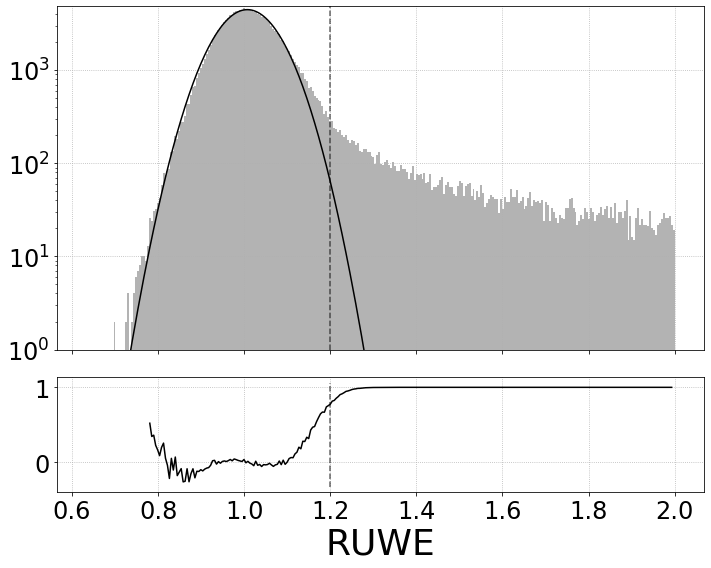

In [10]:
hDat = np.histogram(ruwe, nBins);
valX = (hDat[1][0:-1] + hDat[1][1:])/2;
valY = hDat[0];
y = stats.norm.pdf(valX, r.x[0], r.x[1]);

gc = [0.7, 0.7, 0.7];
gs = plt.GridSpec(2, 1, height_ratios=[3, 1])
fig = plt.figure(figsize=(10,8));
ax = fig.add_subplot(gs[0])
plt.hist(ruwe, nBins, color = gc);
plt.plot(valX, s*y, 'k');
plt.grid(linestyle = ':');
yl = plt.ylim();
plt.ylim(1, yl[1])
plt.plot([1.2,1.2],[1,yl[1]], 'k--', alpha=0.6)
plt.yscale('log')
plt.gca().set_xticklabels([])
plt.tick_params(labelsize = 24)
xl = plt.xlim();


ax = fig.add_subplot(gs[1])
ycut = 20;
plt.plot(valX[valY>=ycut], (valY[valY>=ycut]-s*y[valY>=ycut])/valY[valY>=ycut], 'k');
plt.plot([1.2,1.2],plt.ylim(), 'k--', alpha=0.6);
plt.grid(linestyle = ':');
plt.xlim(xl);
plt.xlabel("RUWE", fontSize=36);
# plt.ylabel("Excess RUWE Ratio", fontSize=24);
plt.tick_params(labelsize = 24);

plt.tight_layout()
plt.savefig("ruwe.pdf",bbox_inches='tight')


(0.5, 1)

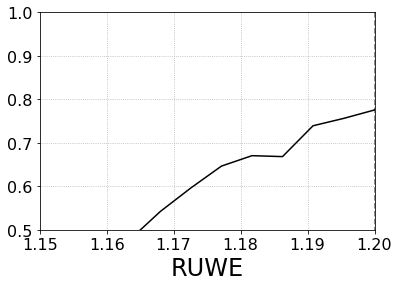

In [12]:
plt.plot(valX[valY>=ycut], (valY[valY>=ycut]-s*y[valY>=ycut])/valY[valY>=ycut], 'k');
plt.plot([1.2,1.2],plt.ylim(), 'k--', alpha=0.6);
plt.grid(linestyle = ':');
plt.xlim(1.15,1.2);
plt.xlabel("RUWE", fontSize=24);
plt.tick_params(labelsize = 16)
plt.ylim(0.5,1)
